# `Movie rating Prediction Model`

---

### `Problem Statement`

- We need to develop Machine learning Model(s) that can predict the rating of a movie according to the type of reviews the movie gets.

In [27]:
# Dataframe Manipulation
import pandas as pd
#For removing any special characters
import re
#For removing stopwords
import nltk
nltk.download('stopwords',quiet = True)
#Stemming the text
from nltk.stem import PorterStemmer
#Importing NumPy
import numpy as np
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

- I will be using an IMDB database to build the models. The particular one that I am using contains the reviews of movies along with their ratings and their audience sentiment.

In [3]:
# Reading the CSV file
movie_revs = pd.read_csv("Reviews.csv")

# Printing the data over here

movie_revs

,Review,Rating,Sentiment
0,"Kurt Russell's chameleon-like performance, cou...",10,1
1,It was extremely low budget(it some scenes it ...,8,1
2,James Cagney is best known for his tough chara...,8,1
3,"Following the brilliant ""Goyôkiba"" (aka. ""Hanz...",8,1
4,One of the last classics of the French New Wav...,10,1
...,...,...,...
49995,(spoiler) it could be the one the worst movie ...,4,0
49996,"So, you've seen the Romero movies, yes? And yo...",1,0
49997,Just listen to the Broadway cast album and to ...,3,0
49998,I have been a fan of the Carpenters for a long...,3,0


In [4]:
# Checking for any missing values in our database by checking the number of entries in each column
movie_revs.count()

Review       50000
Rating       50000
Sentiment    50000
dtype: int64

- As we can see that we don't have any missing values in our database. So we go directly to preprocessing the data before training our models.

### `Data Preprocessing`

Data preprocessing for this project will particularly include processing the text reviews and first cleaning it. Cleaning the text will include the following steps:

- **Converting the text into lowercase:** First, we will convert all the reviews into lowercase to enhance the uniformity of the text.
- **Removing any special characters:** This will remove any character other than the english alphabet and will simplify the text.
- **Removing stopwords:** Stopwords are words that do not add any particular value to the meaning of the text but are used to bring structure to the text. We don't need such words while processing the data and thus we will remove all these stopwords.
- **Lemmatization/Stemming:** This will convert all the words into their base form thus simplifying the text to train our model.

In [5]:
#Copying the original data into another column that we will clean. We will do this so that we can see the changes that happen in our data.
movie_revs['Clean_data'] = movie_revs['Review']
movie_revs.head()

,Review,Rating,Sentiment,Clean_data
0,"Kurt Russell's chameleon-like performance, cou...",10,1,"Kurt Russell's chameleon-like performance, cou..."
1,It was extremely low budget(it some scenes it ...,8,1,It was extremely low budget(it some scenes it ...
2,James Cagney is best known for his tough chara...,8,1,James Cagney is best known for his tough chara...
3,"Following the brilliant ""Goyôkiba"" (aka. ""Hanz...",8,1,"Following the brilliant ""Goyôkiba"" (aka. ""Hanz..."
4,One of the last classics of the French New Wav...,10,1,One of the last classics of the French New Wav...


In [6]:
#Convert the text into lowercase
movie_revs['Clean_data'] = movie_revs['Clean_data'].str.lower()
movie_revs.head()

,Review,Rating,Sentiment,Clean_data
0,"Kurt Russell's chameleon-like performance, cou...",10,1,"kurt russell's chameleon-like performance, cou..."
1,It was extremely low budget(it some scenes it ...,8,1,it was extremely low budget(it some scenes it ...
2,James Cagney is best known for his tough chara...,8,1,james cagney is best known for his tough chara...
3,"Following the brilliant ""Goyôkiba"" (aka. ""Hanz...",8,1,"following the brilliant ""goyôkiba"" (aka. ""hanz..."
4,One of the last classics of the French New Wav...,10,1,one of the last classics of the french new wav...


In [7]:
#Removing any kind of special characters that might be present in out text by defining a function
def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)
    
#Applying it to the whole dataset
movie_revs['Clean_data'] = movie_revs['Clean_data'].apply(remove_special_chars)

#Checking if it worked
movie_revs.head()

,Review,Rating,Sentiment,Clean_data
0,"Kurt Russell's chameleon-like performance, cou...",10,1,kurt russells chameleonlike performance couple...
1,It was extremely low budget(it some scenes it ...,8,1,it was extremely low budgetit some scenes it l...
2,James Cagney is best known for his tough chara...,8,1,james cagney is best known for his tough chara...
3,"Following the brilliant ""Goyôkiba"" (aka. ""Hanz...",8,1,following the brilliant goykiba aka hanzo the ...
4,One of the last classics of the French New Wav...,10,1,one of the last classics of the french new wav...


In [8]:
#Removing stopwords from the text

from nltk.corpus import stopwords

#Filtering out the stopwords for english only
stop_words = set(stopwords.words('english'))

#Defining a function to remove all the stopwords
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

movie_revs['Clean_data'] = movie_revs['Clean_data'].apply(remove_stopwords)
movie_revs.head()

,Review,Rating,Sentiment,Clean_data
0,"Kurt Russell's chameleon-like performance, cou...",10,1,kurt russells chameleonlike performance couple...
1,It was extremely low budget(it some scenes it ...,8,1,extremely low budgetit scenes looks like recor...
2,James Cagney is best known for his tough chara...,8,1,james cagney best known tough characters gangs...
3,"Following the brilliant ""Goyôkiba"" (aka. ""Hanz...",8,1,following brilliant goykiba aka hanzo razor sw...
4,One of the last classics of the French New Wav...,10,1,one last classics french new wave direction ci...


In [9]:
# Stemming the data
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    return " ".join(words)

movie_revs['Clean_data'] = movie_revs['Clean_data'].apply(stem_words)
display(movie_revs.head())

,Review,Rating,Sentiment,Clean_data
0,"Kurt Russell's chameleon-like performance, cou...",10,1,kurt russel chameleonlik perform coupl john ca...
1,It was extremely low budget(it some scenes it ...,8,1,extrem low budgetit scene look like record hom...
2,James Cagney is best known for his tough chara...,8,1,jame cagney best known tough charact gangster ...
3,"Following the brilliant ""Goyôkiba"" (aka. ""Hanz...",8,1,follow brilliant goykiba aka hanzo razor sword...
4,One of the last classics of the French New Wav...,10,1,one last classic french new wave direct cineas...


Now we have cleaned our data. The next step that I'll be taking is to use some basic matplotlib functions to develop a relation between a movie's ratings and it's sentiment. This way we will be able to make a model that can predict both the rating and the sentiment of a movie.

### `Relation between user sentiment and ratings`

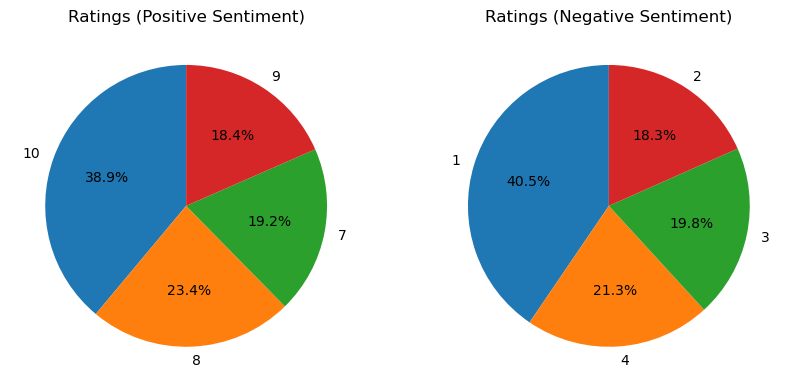

In [10]:
#importing matplotlib
import matplotlib.pyplot as plt
pos_sent = movie_revs[movie_revs['Sentiment']==1]
neg_sent = movie_revs[movie_revs['Sentiment']==0]
pos_counts = pos_sent['Rating'].value_counts()
neg_counts = neg_sent['Rating'].value_counts()
# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].pie(pos_counts, labels=pos_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title("Ratings (Positive Sentiment)")

axes[1].pie(neg_counts, labels=neg_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Ratings (Negative Sentiment)")

plt.show()

- As we can see here, all the movies that recieved a positive sentiment had a rating greater than or equal to 7 and all the movies that recieved a negative sentiment had a rating lesser than or equal to 4.
- This is a clear indication that higher the rating, more will be the chances of the movie getting a positive sentiment.
- So it would be a logical call to just predict the ratings of the reviews and then use them to predict the general sentiment of the movies. For example, if we get the predicted rating of the movie to be greater than 7, we would assign a positive sentiment to it and if the predicted rating of the movie is less than 4, we would assign a negative sentiment to the movie and for ratings of 5 & 6, we would assign a neutral sentiment to the movie.

### `Splitting the dataset into training, validating and testing datasets`

In [11]:
from sklearn.model_selection import train_test_split

X = movie_revs['Clean_data']
y = movie_revs['Rating']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


- Now as we still have the data in the form of text, we can't train our model on the data as is.
- To train a model, we first need to convert all the textual data into numeric one.
- We will use TF-IDF to convert all the text into vectors. TF will help us with the term frequency and IDF will help us determine how rare a particular word is in the dataset.

### `Training the model`

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), min_df=2, max_df=0.9)),
    ("clf", LogisticRegression(max_iter=200, class_weight="balanced", n_jobs=-1))
])

pipe.fit(X_train, y_train)
print("VALIDATION")
y_pred = pipe.predict(X_valid)
print(classification_report(y_valid, y_pred))
print(confusion_matrix(y_valid, y_pred))


VALIDATION
              precision    recall  f1-score   support

           1       0.64      0.66      0.65      2024
           2       0.24      0.19      0.21       917
           3       0.26      0.25      0.26       992
           4       0.34      0.36      0.35      1066
           7       0.31      0.37      0.34       961
           8       0.29      0.25      0.27      1172
           9       0.24      0.22      0.23       921
          10       0.57      0.61      0.59      1947

    accuracy                           0.42     10000
   macro avg       0.36      0.37      0.36     10000
weighted avg       0.41      0.42      0.41     10000

[[1345  231  175  134   21   22   27   69]
 [ 324  175  179  154   29   11   18   27]
 [ 205  149  248  250   64   30   15   31]
 [ 113  103  208  387  132   52   27   44]
 [  22   24   41  102  355  217   94  106]
 [  23   16   41   59  259  298  182  294]
 [  21   12   16   28  127  177  203  337]
 [  59   12   33   31  141  211  264 

In [17]:
#Running our model on the test dataset
from sklearn.metrics import classification_report, confusion_matrix

y_test_pred = pipe.predict(X_test)
print("=== TEST RESULTS ===")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

=== TEST RESULTS ===
              precision    recall  f1-score   support

           1       0.64      0.67      0.65      2025
           2       0.24      0.20      0.22       917
           3       0.25      0.24      0.24       992
           4       0.35      0.35      0.35      1066
           7       0.31      0.36      0.33       960
           8       0.28      0.24      0.26      1172
           9       0.22      0.20      0.21       922
          10       0.55      0.61      0.58      1946

    accuracy                           0.41     10000
   macro avg       0.36      0.36      0.36     10000
weighted avg       0.40      0.41      0.41     10000

[[1351  233  188  114   25   23   21   70]
 [ 295  186  173  169   21   25   13   35]
 [ 211  165  237  216   56   42   21   44]
 [ 121  117  222  376  113   51   18   48]
 [  27   29   44  103  346  198   86  127]
 [  27   18   34   59  291  280  186  277]
 [  14    7   22   19  134  192  186  348]
 [  56   19   35   21  134 

- As we can see, the accuracy of the model is not the best. But the thing to keep in mind is that my model predicts the ratings from 1 to 10. So even if the model predicts let's say 4 for a movie whose actual rating is 3, it would be considered inaccurate.
- I have shown some errors that have occured in my model below that justify the above statement.

In [22]:
test_df = pd.DataFrame({
    "text": X_test, "true": y_test, "pred": y_test_pred
})
mistakes = test_df[test_df.true != test_df.pred]
mistakes.head(20)


,text,true,pred
22091,watch movi project love pleas tell nicola cage...,3,2
40180,mame disgrac mani thingsto lucil ball stori to...,1,7
21108,bunch women cant act sit around talk smoke pot...,1,2
11659,endless bound inhuman kind never fail stun tru...,8,10
26989,chri smith superior filmmak seldomseen talent ...,8,1
19672,longtim fan superman comic seri first two chri...,4,1
40286,avid gone wind fan disappoint watch origin mov...,1,9
4628,second view movi like even first time full nua...,9,10
41591,love old monster movi pure camp valu one disap...,4,2
10812,base fact stori teenag name homer hickam jake ...,8,10


### `Sentiment Analysis`

- Now we will use these predicted rating to predict the general sentiment of the audience about a movie.

In [23]:
def rating_to_sentiment(rating):
    if rating >= 7:
        return "positive"
    elif rating <= 4:
        return "negative"
    else:
        return "neutral"
# Ratings from model
y_pred_ratings = pipe.predict(X_test)

# Converting them to sentiments
y_pred_sentiments = [rating_to_sentiment(r) for r in y_pred_ratings]

from sklearn.metrics import classification_report, confusion_matrix

# True sentiment from real ratings
y_true_sentiments = [rating_to_sentiment(r) for r in y_test]

print(classification_report(y_true_sentiments, y_pred_sentiments))
print(confusion_matrix(y_true_sentiments, y_pred_sentiments))

              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      5000
    positive       0.88      0.89      0.89      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

[[4374  626]
 [ 534 4466]]


- As we can see the model predicts the sentiment with very high accuracy as the range of prediction is reduced (Negative,Positive or Neutral).
- Now we will save the model for further use.

In [25]:
#Saving the model for further use
import joblib
joblib.dump(pipe, "rating_tfidf_logreg.joblib")

['rating_tfidf_logreg.joblib']